In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Visualization

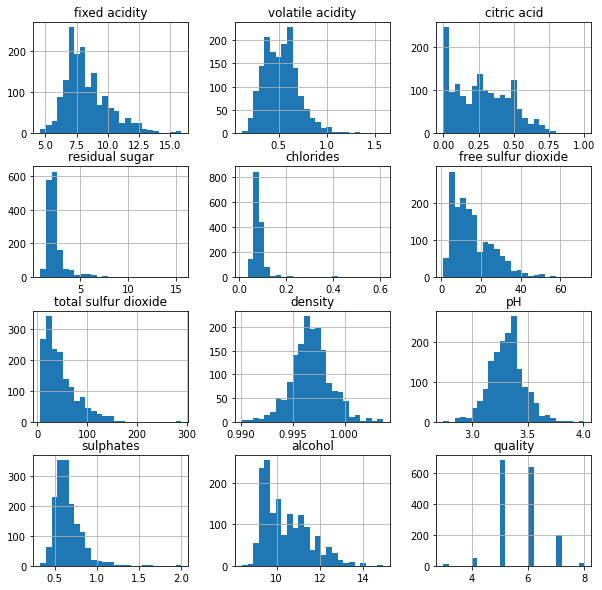

In [7]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Text(0, 0.5, 'alcohol')

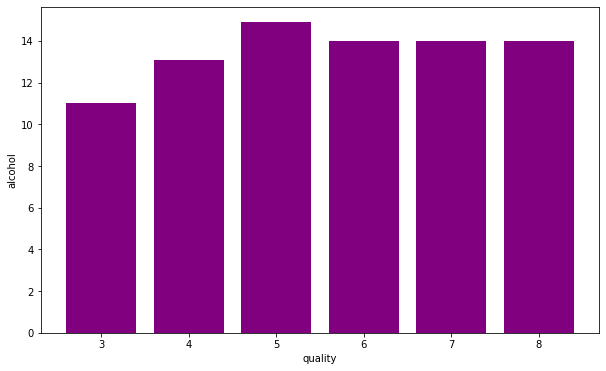

In [11]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='purple')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

Correlation

<AxesSubplot:>

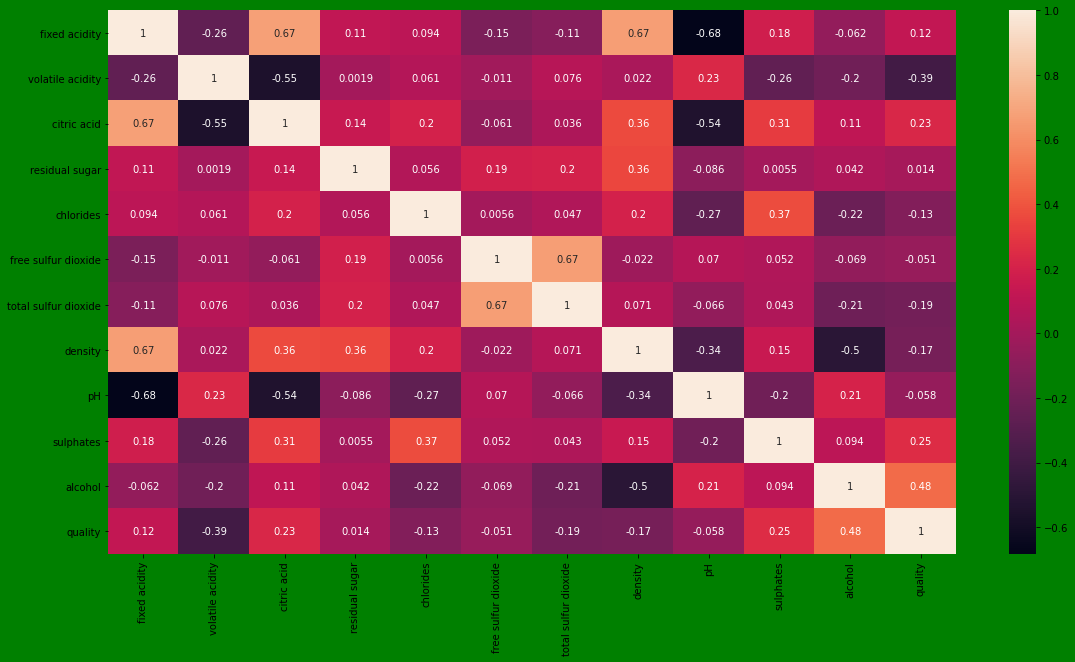

In [10]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

In [14]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

In [15]:
#correlation number is high #Greater than the number 0.7 if any feature is correlated value above 0.7 # the feature here is total sulphur dioxide

In [16]:
# drop the feature which is more correlated

new_df=df.drop('total sulfur dioxide',axis=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [17]:
# checking if there is null value

new_df.isnull().sum()


fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [19]:
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [31]:
# Splitting dataset

X=new_df.iloc[:,0:-1]

In [32]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4


In [30]:
Y=new_df.iloc[:,-1]
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

Normalization

In [34]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)
# display values
print(new_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


In [35]:
X_train.shape

(1279, 10)

In [36]:
Y_train.shape

(1279,)

In [37]:
X_test.shape

(320, 10)

In [38]:
Y_test.shape

(320,)

Applying Model

In [39]:
# I am gonna use RandomForestClassifier according to me in ML which will give more accuracy 

In [ ]:
# importing modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


#creating RandomForestClassifier constructor

rnd = RandomForestClassifier()

# fit data

fit_rnd = rnd.fit(new_xtrain,Y_train)


In [48]:

# predicting score

pred = list(rnd.predict(X_test))

rnd_score = rnd.score(new_xtest,Y_test)
print('score of model is : ',rnd_score)

# display error rate

print('calculating the error')

# calculating mean squared error

rnd_MSE = mean_squared_error(Y_test,pred)

# calculating root mean squared error

rnd_RMSE = np.sqrt(rnd_MSE)

# display MSE

print('mean squared error is : ',rnd_MSE)

# display RMSE

print('root mean squared error is : ',rnd_RMSE)
print(classification_report(pred,Y_test))

score of model is :  0.715625
calculating the error
mean squared error is :  0.88125
root mean squared error is :  0.9387491677759293
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.93      0.48      0.63       261
           6       0.21      0.44      0.28        59
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.48       320
   macro avg       0.19      0.15      0.15       320
weighted avg       0.79      0.47      0.57       320



C:\Users\DEEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_df = {'predicted_values': pred, 'original_values': Y_test}

In [53]:

#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
1035,6,7
49,6,5
799,5,6
538,6,7
660,5,6
990,5,5
398,5,6
1068,5,7
1155,5,5
468,5,6


In [55]:
import pickle
file = 'wine_quality.csv'
#save file
save = pickle.dump(rnd,open(file,'wb'))